In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading

In [59]:
titanic_train = pd.read_csv('/content/drive/MyDrive/My Project/Titanic/train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
# Drop
titanic_drop=titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_train = titanic_drop.copy()
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
titanic_train.shape

(891, 8)

In [39]:
titanic_train.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [49]:
titanic_train[titanic_train.duplicated() == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [41]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Value Analysis

In [50]:
titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [61]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_train['Embarked'] = titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0])
titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [18]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Exploratory Data Analysis

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


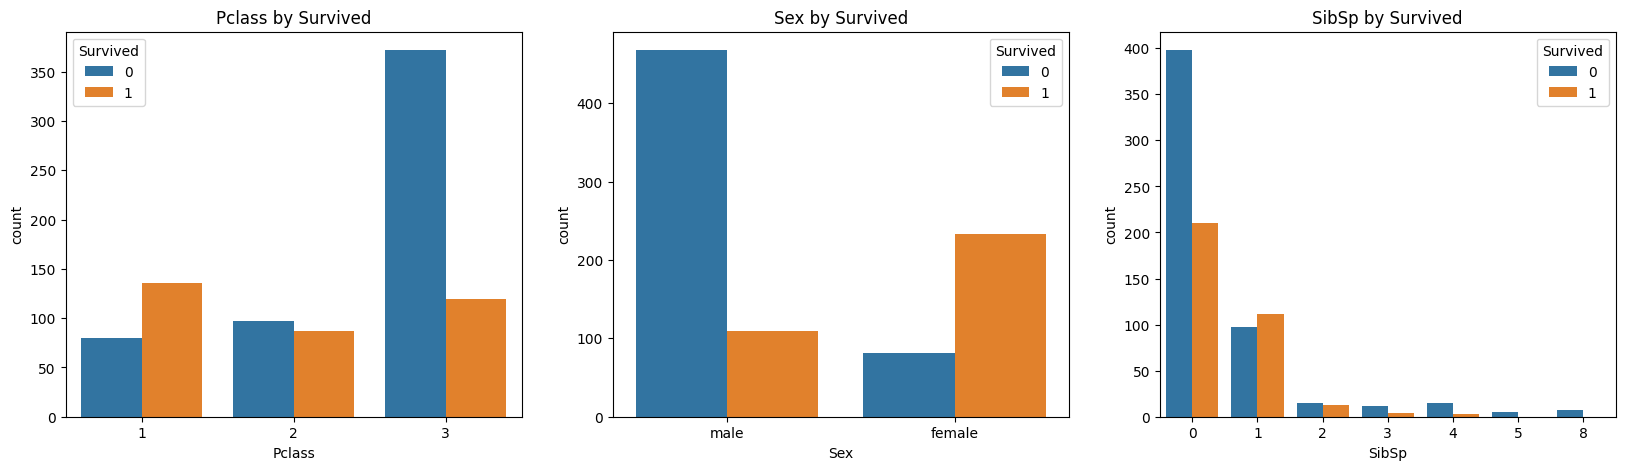

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


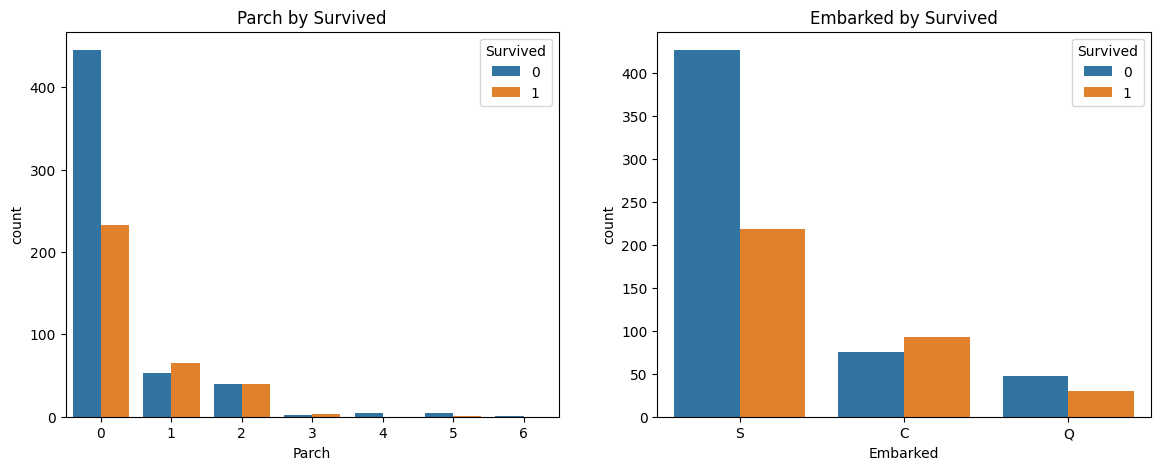

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

Pclass_counts = (titanic_train['Pclass'].value_counts())
print(Pclass_counts)
sns.countplot(x = titanic_train['Pclass'], hue = titanic_train['Survived'], ax= axes[0])
axes[0].set_title('Pclass by Survived')

Sex_counts = (titanic_train['Sex'].value_counts())
print(Sex_counts)
sns.countplot(x = titanic_train['Sex'], hue = titanic_train['Survived'], ax= axes[1])
axes[1].set_title('Sex by Survived')

SibSp_counts = (titanic_train['SibSp'].value_counts())
print(SibSp_counts)
sns.countplot(x = titanic_train['SibSp'], hue = titanic_train['Survived'], ax= axes[2])
axes[2].set_title('SibSp by Survived')

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

Parch_counts = (titanic_train['Parch'].value_counts())
print(Parch_counts)
sns.countplot(x = titanic_train['Parch'], hue = titanic_train['Survived'], ax= axes[0])
axes[0].set_title('Parch by Survived')

Embarked_counts = (titanic_train['Embarked'].value_counts())
print(Embarked_counts)
sns.countplot(x = titanic_train['Embarked'], hue = titanic_train['Survived'], ax= axes[1])
axes[1].set_title('Embarked by Survived')

plt.show()



plt.show()

<ipython-input-62-f30e27601908>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train['Age'], ax=axes[0])
<ipython-input-62-f30e27601908>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train['Fare'], ax=axes[1])


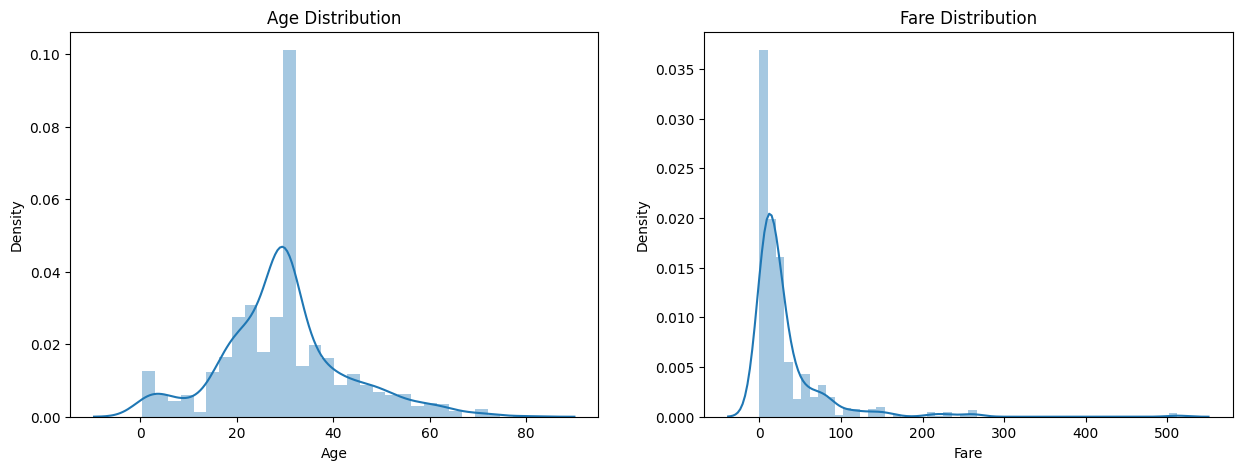

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.distplot(titanic_train['Age'], ax=axes[0])
axes[0].set_title('Age Distribution')

sns.distplot(titanic_train['Fare'], ax=axes[1])
axes[1].set_title('Fare Distribution')

plt.show()

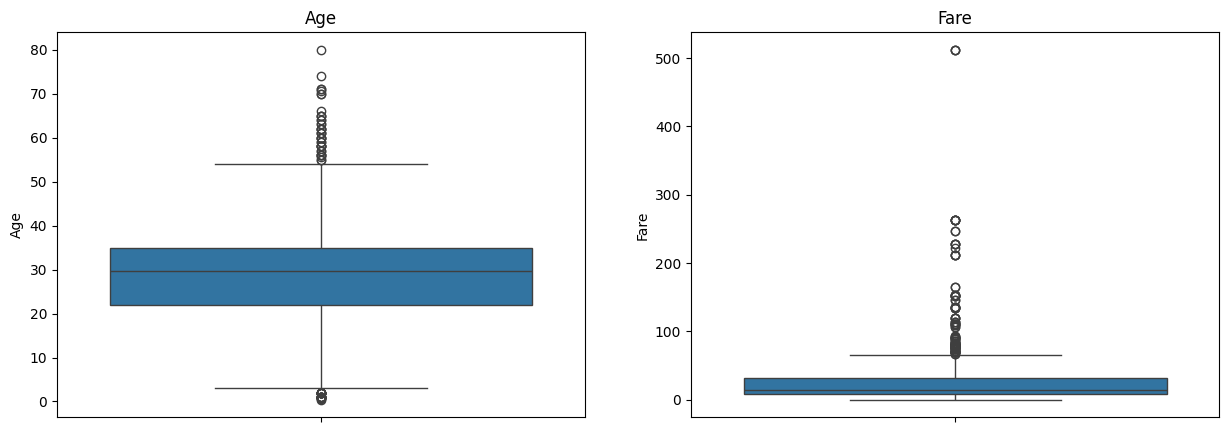

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(y=titanic_train['Age'], ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(y=titanic_train['Fare'], ax=axes[1])
axes[1].set_title('Fare')

plt.show()

In [57]:
# Find outliers using IQR method
def outlier_iqr(titanic_train, column):
    Q1 = titanic_train[column].quantile(0.25)
    Q3 = titanic_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = titanic_train[(titanic_train[column] < lower_bound) | (titanic_train[column] > upper_bound)]
    return len (outliers), lower_bound, upper_bound
Age_outliers_iqr, Age_lower_bound_lower_bound, Age_upper_bound = outlier_iqr(titanic_train, 'Age')
Fare_outliers_iqr, Fare_lower_bound, Fare_upper_bound = outlier_iqr(titanic_train, 'Fare')
Age_outliers_iqr, Fare_outliers_iqr

(66, 116)

In [63]:
# Using Label Encoder
columns = ['Sex', 'Embarked']
for column in columns:
    label_encoder = LabelEncoder()
    titanic_train[column] = label_encoder.fit_transform(titanic_train[column])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [66]:
titanic_train.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


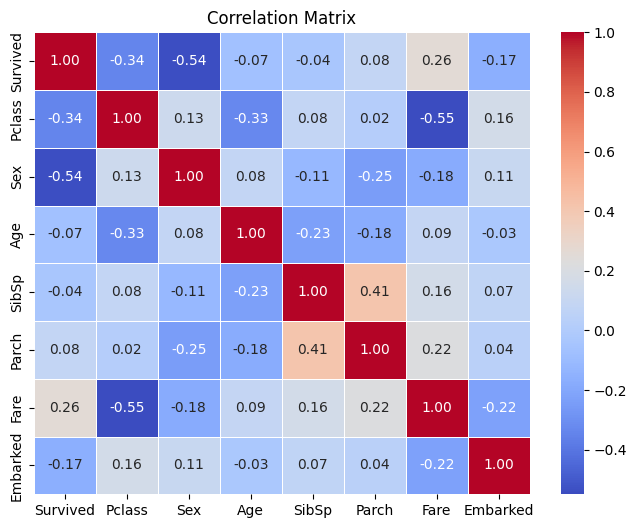

In [69]:
# Correlation Matrix
numeric_columns = titanic_train.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [70]:
survived = titanic_train[titanic_train['Survived'] == 1]
not_survived = titanic_train[titanic_train['Survived'] == 0]
print(survived.shape, not_survived.shape)

(342, 8) (549, 8)


In [89]:
x = titanic_train.drop(['Survived'], axis = 1)
y = titanic_train['Survived']

In [73]:
over_sampling = RandomOverSampler(random_state=42)
x_data, y_data = over_sampling.fit_resample(x, y)

x_data.shape, y_data.shape

((1098, 7), (1098,))

In [74]:
y_data.value_counts()

,count
Survived,
0,549
1,549


In [76]:
titanic_train_new = pd.concat([x_data, y_data], axis = 1)
titanic_train = titanic_train_new.copy()
titanic_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,2,0
1,1,0,38.000000,1,0,71.2833,0,1
2,3,0,26.000000,0,0,7.9250,2,1
3,1,0,35.000000,1,0,53.1000,2,1
4,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
1093,3,1,29.000000,0,0,7.7500,1,1
1094,1,0,21.000000,0,0,77.9583,2,1
1095,1,1,29.699118,0,0,29.7000,0,1
1096,1,0,30.000000,0,0,93.5000,2,1


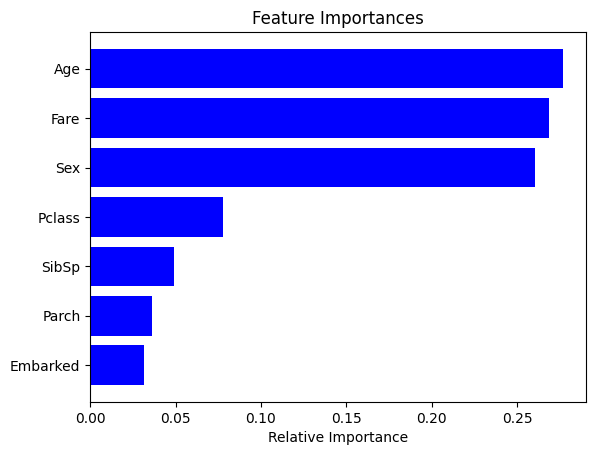

In [77]:
rand_clf = RandomForestClassifier(random_state = 0)
rand_clf.fit(x_data, y_data)

features = x.columns
importances = rand_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [90]:
# Dividing the dependent and independent variable into train and test set (25-75 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [93]:
# Logistic Regression
logistic= LogisticRegression()
logistic.fit(x_train, y_train)
y_pred_LR = logistic.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy of Logistic Regression:", accuracy_LR)

Accuracy of Logistic Regression: 0.7818181818181819


In [96]:
# CV Scores
cv_scores = cross_val_score(logistic, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.76363636 0.79545455 0.75       0.78995434 0.77625571]
Mean cross-validation score: 0.7750601909506019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


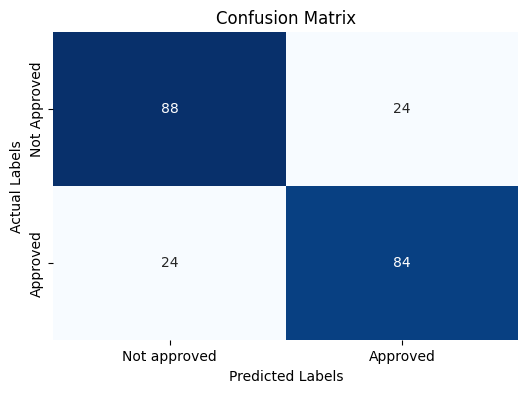

In [99]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels= ['Not approved', 'Approved'], yticklabels= ['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [100]:
# Decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_DT = decision_tree.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Accuracy of Decision Tree Classifier:", accuracy_DT)

Accuracy of Decision Tree Classifier: 0.8318181818181818


In [101]:
# CV Scores
cv_scores = cross_val_score(logistic, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.76363636 0.79545455 0.75       0.78995434 0.77625571]
Mean cross-validation score: 0.7750601909506019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


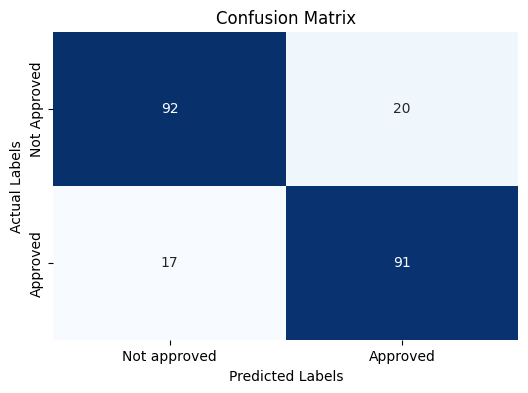

In [102]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels= ['Not approved', 'Approved'], yticklabels= ['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
# Random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred_RF = random_forest.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Random Forest Classifier:", accuracy_RF)


Accuracy of Random Forest Classifier: 0.8681818181818182


In [104]:
models_performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
        'Accuracy': [accuracy_LR, accuracy_DT, accuracy_RF]}

titanic_train_comparison = pd.DataFrame(models_performance)
titanic_train_comparison = titanic_train_comparison.sort_values(by = 'Accuracy', ascending = False)
print (titanic_train_comparison)

                 Model  Accuracy
2        Random Forest  0.868182
1        Decision Tree  0.831818
0  Logistic Regression  0.781818


## Test Data Loading

In [114]:
titanic_test = pd.read_csv('/content/drive/MyDrive/My Project/Titanic/test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [116]:
# Drop
titanic_drop=titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_test = titanic_drop.copy()
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [117]:
titanic_test.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [118]:
titanic_test[titanic_test.duplicated() == True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
79,3,female,24.0,0,0,7.7500,Q
83,3,male,NaN,0,0,7.8958,S
93,3,male,NaN,0,0,8.0500,S
102,3,male,NaN,0,0,7.7500,Q
107,3,male,NaN,0,0,7.7500,Q
124,3,male,NaN,0,0,7.7500,Q
148,1,male,NaN,0,0,26.5500,S
158,1,male,42.0,0,0,26.5500,S
180,2,male,30.0,0,0,13.0000,S
183,3,male,NaN,0,0,7.7500,Q


In [119]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


# MIssing Values Treatment

In [120]:
titanic_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [121]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Fare'] = titanic_test['Embarked'].fillna(titanic_test['Fare'].mean())
titanic_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [132]:
# Using Label Encoder
columns = ['Sex', 'Fare', 'Embarked']
for column in columns:
    label_encoder = LabelEncoder()
    titanic_test[column] = label_encoder.fit_transform(titanic_test[column])
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,1,1
1,3,0,47.0,1,0,2,2
2,2,1,62.0,0,0,1,1
3,3,1,27.0,0,0,2,2
4,3,0,22.0,1,1,2,2


## Fit the model

In [133]:
# Fit the model
titanic_test.prediction = random_forest.predict(titanic_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

<ipython-input-133-69cacc3c8732>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  titanic_test.prediction = random_forest.predict(titanic_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])


In [134]:
titanic_test['Survived(Predicted)'] = titanic_test.prediction
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived(Predicted)
0,3,1,34.5,0,0,1,1,0
1,3,0,47.0,1,0,2,2,0
2,2,1,62.0,0,0,1,1,0
3,3,1,27.0,0,0,2,2,1
4,3,0,22.0,1,1,2,2,1


In [135]:
titanic_test['Survived(Predicted)'].value_counts()

,count
Survived(Predicted),
0,274
1,144
